In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
IM_DIR = 'images'

In [3]:
def imshow(im, size=(6, 8)):
    plt.figure(figsize=size)
    plt.imshow(im, cmap='gray')

In [4]:
for name in os.listdir(IM_DIR): print(name)

0_2.jpg
0_0.jpg
2_1.jpg
0_1.jpg
0_3.jpg
ChatExport_2021-07-27
2_0.jpg
1_0.jpg


In [5]:
im_name = os.listdir(IM_DIR)[2]
im_fullname = os.path.join(IM_DIR, im_name)
im = cv2.imread(im_fullname, cv2.IMREAD_GRAYSCALE)
#im = im[400:4000, 600:2700]
shape = im.shape

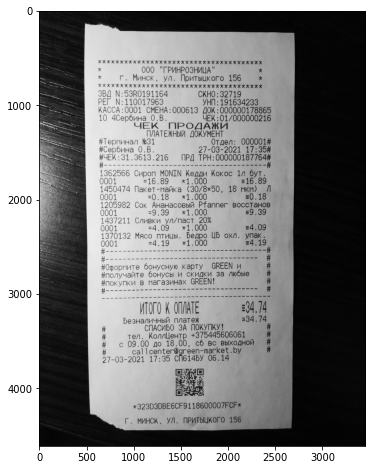

In [6]:
imshow(im)

In [7]:
def rotate(im, angle):
    h, w = im.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), -angle, 1)
    return cv2.warpAffine(im, M, (w, h), borderValue=255)

def var_of_brightness_sum_over_rows(im):
    return im.sum(axis=1).var()

def maximize_var(im):
    max_var = 0
    max_angle = 0
    for angle in np.arange(-20., 20., 0.1):
        var = var_of_brightness_sum_over_rows(rotate(im, angle))
        print(angle, var)
        if var > max_var:
            max_var = var
            max_angle = angle
    return max_angle

In [8]:
%%time
maximize_var(rotate(im, 14))

-20.0 2516521774.903283
-19.9 2505034102.344998
-19.799999999999997 2493345032.067693
-19.699999999999996 2481605870.258669
-19.599999999999994 2470022113.78347
-19.499999999999993 2458521382.04461
-19.39999999999999 2447079987.8799305
-19.29999999999999 2435619713.359751
-19.19999999999999 2424447124.0448093
-19.099999999999987 2413380026.064643
-18.999999999999986 2402437439.3628454
-18.899999999999984 2391690751.0140634
-18.799999999999983 2381001840.769336
-18.69999999999998 2370305909.4424133
-18.59999999999998 2359877698.1228247
-18.49999999999998 2349952123.2699585
-18.399999999999977 2340230733.180958
-18.299999999999976 2330497886.3009014
-18.199999999999974 2320875242.832973
-18.099999999999973 2311248354.395894
-17.99999999999997 2301715410.253492
-17.89999999999997 2292425993.19367
-17.79999999999997 2283420825.9314427
-17.699999999999967 2274768534.0068173
-17.599999999999966 2266578878.917368
-17.499999999999964 2258704490.3956547
-17.399999999999963 2251064400.472656
-17

1.8000000000003098 2279927466.655158
1.9000000000003112 2296109023.056387
2.0000000000003126 2312500329.212202
2.100000000000314 2329041948.3934393
2.2000000000003155 2345621618.222329
2.300000000000317 2362364034.2448816
2.4000000000003183 2379406354.607364
2.5000000000003197 2396662111.802534
2.600000000000321 2414130772.3986607
2.7000000000003226 2431750982.7176642
2.800000000000324 2449361441.1125374
2.9000000000003254 2467088534.035095
3.000000000000327 2485027002.208535
3.1000000000003283 2503213573.5681424
3.2000000000003297 2521365253.7983103
3.300000000000331 2539397775.6072407
3.4000000000003325 2557277778.6493053
3.500000000000334 2575193963.6931243
3.6000000000003354 2593447136.658529
3.700000000000337 2611875295.0372405
3.800000000000338 2630509762.3892746
3.9000000000003396 2649341770.452879
4.000000000000341 2668230018.963224
4.1000000000003425 2687059026.7960477
4.200000000000344 2705775161.0569825
4.300000000000345 2724614820.493815
4.400000000000347 2743676910.720467


19.900000000000567

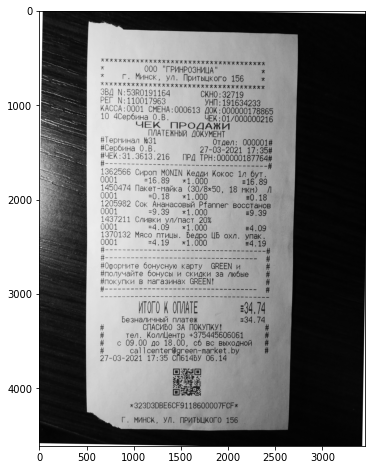

In [9]:
imshow(rotate(im, 1))

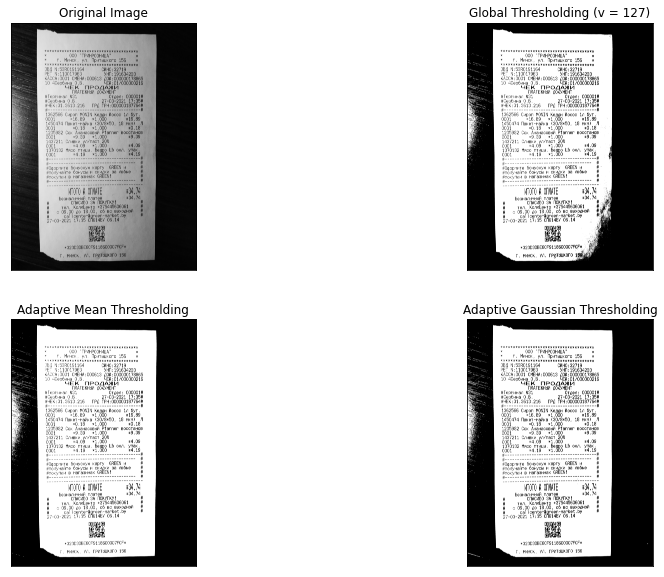

In [10]:
blocksize=im.shape[1]+1
ret,th1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,blocksize,2)
th3 = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,blocksize,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [im, th1, th2, th3]

plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

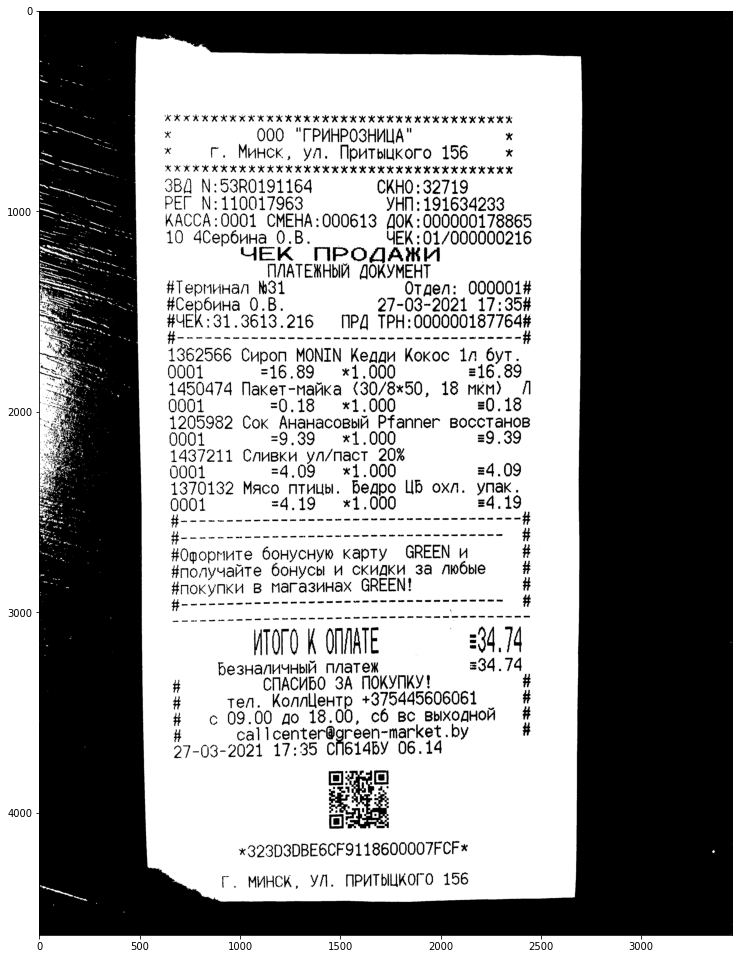

In [11]:
imshow(np.dstack([th3, th3, th3]), (20, 17))

CPU times: user 373 ms, sys: 284 ms, total: 657 ms
Wall time: 789 ms


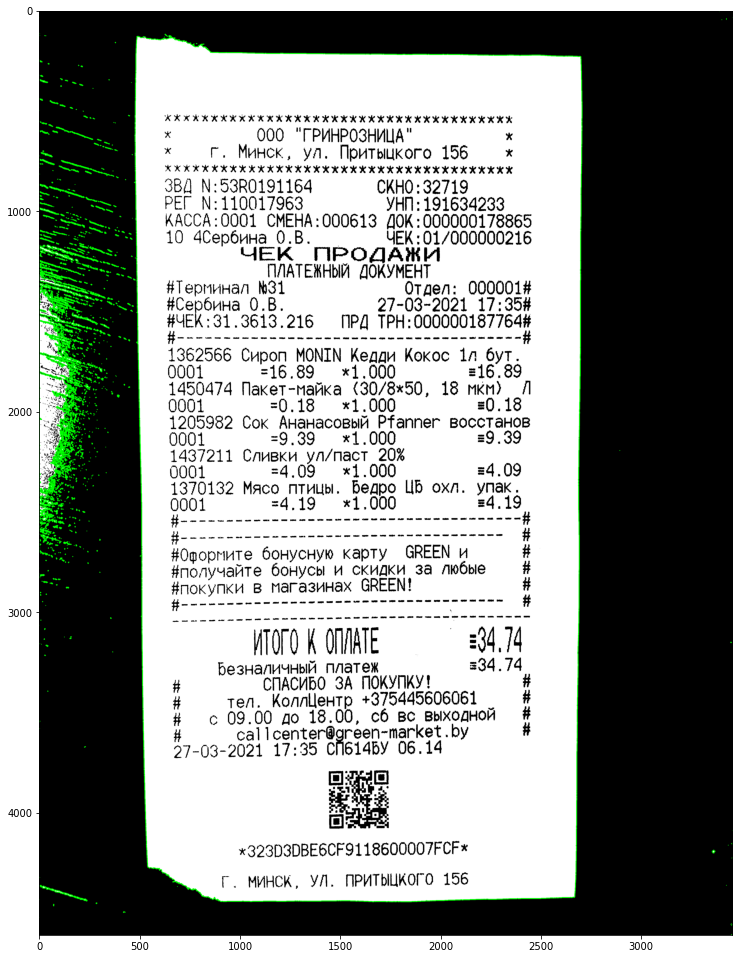

In [12]:
%%time
contours, hierarchy = cv2.findContours(th3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
drawing = cv2.drawContours(np.dstack([th3]*3), contours, -1, (0, 255, 0), 3)
imshow(drawing, (20, 17))

In [13]:
areas = np.array([cv2.contourArea(cnt) for cnt in contours])

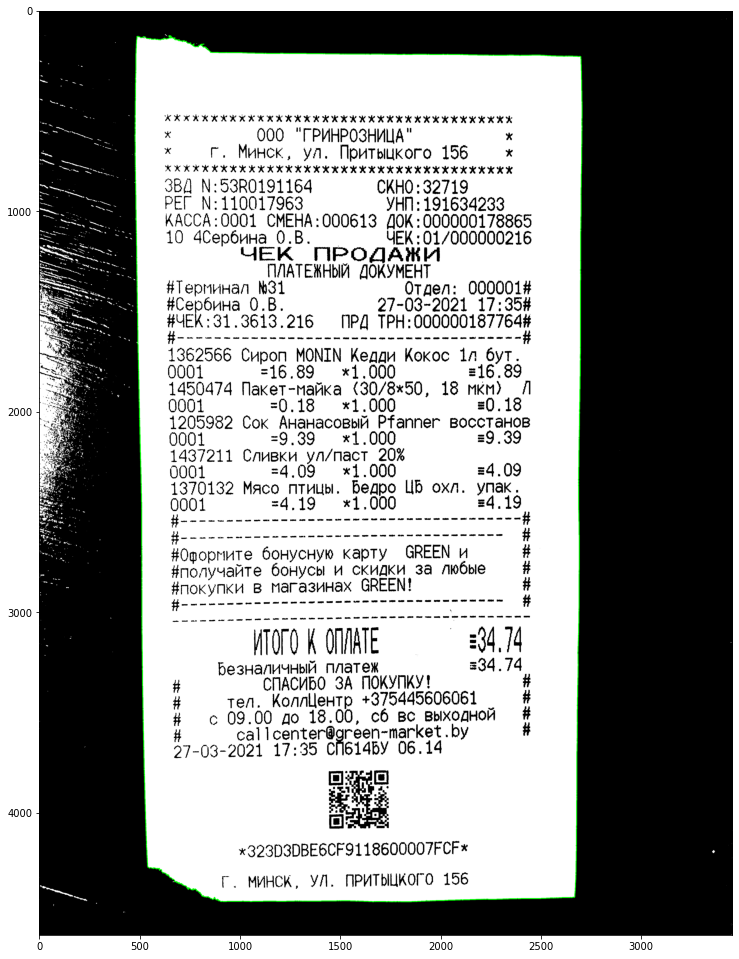

In [14]:
big_contours = [contours[i] for i in (-areas).argsort()][:1]
drawing = cv2.drawContours(np.dstack([th3]*3), big_contours, -1, (0, 255, 0), 3)
imshow(drawing, (20, 17))

In [15]:
big_contours[0][:, :, 0].max()

2704

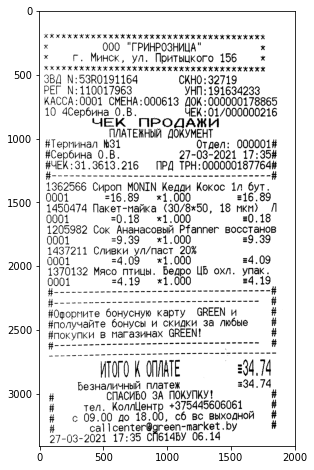

In [136]:
t = big_contours[0][:, :, 1].min()
b = big_contours[0][:, :, 1].max()
l = big_contours[0][:, :, 0].min()
r = big_contours[0][:, :, 0].max()

x_offset = int(0.05 * (r - l))
y_offset = int(0.05 * (b - t))

t += y_offset
b -= y_offset
l += x_offset
r -= x_offset

imshow(th3[t:b, l:r])

In [137]:
im = rotate(th3[t:3750, l:r], 0.5)
# im = rotate(th3[t:b, l:r], 0.5)

CPU times: user 223 ms, sys: 3.84 ms, total: 226 ms
Wall time: 218 ms


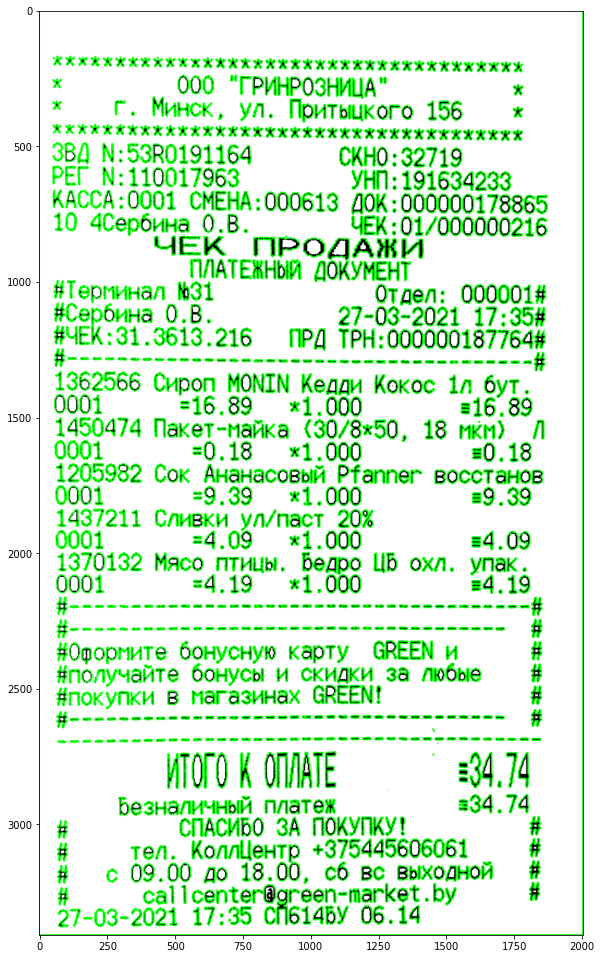

In [138]:
%%time
new_contours, hierarchy = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
drawing = cv2.drawContours(np.dstack([im]*3), new_contours, -1, (0, 255, 0), 3, hierarchy=hierarchy, maxLevel=2)
imshow(drawing, (20, 17))

In [139]:
def get_bounds(contour, as_points=True):
    t = contour[:, :, 1].min()
    b = contour[:, :, 1].max()
    l = contour[:, :, 0].min()
    r = contour[:, :, 0].max()
    if as_points:
        return np.array([[[l, t]], [[r, t]], [[r, b]], [[l, b]]])
    else:
        return t, b, l, r

In [140]:
def get_center(contour):
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return cx, cy

In [141]:
ok_contours = [cnt for cnt in new_contours if (cv2.contourArea(cnt) > 10) and (cv2.contourArea(cnt) < 1e+6)]
ok_centers = [get_center(cnt) for cnt in ok_contours]
len(ok_contours)

1548

CPU times: user 172 ms, sys: 3.89 ms, total: 176 ms
Wall time: 174 ms


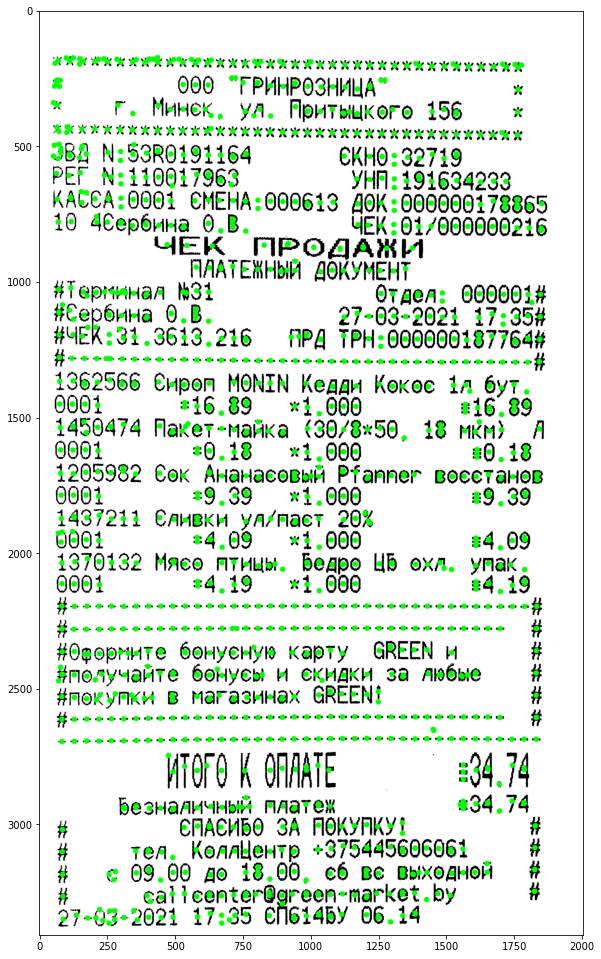

In [142]:
%%time
drawing = cv2.circle(np.dstack([im]*3), ok_centers[0], radius=10, color=(0, 255, 0), thickness=-1)
for center in ok_centers:
    drawing = cv2.circle(drawing, center, radius=10, color=(0, 255, 0), thickness=-1)
imshow(drawing, (20, 17))

CPU times: user 169 ms, sys: 4.04 ms, total: 174 ms
Wall time: 171 ms


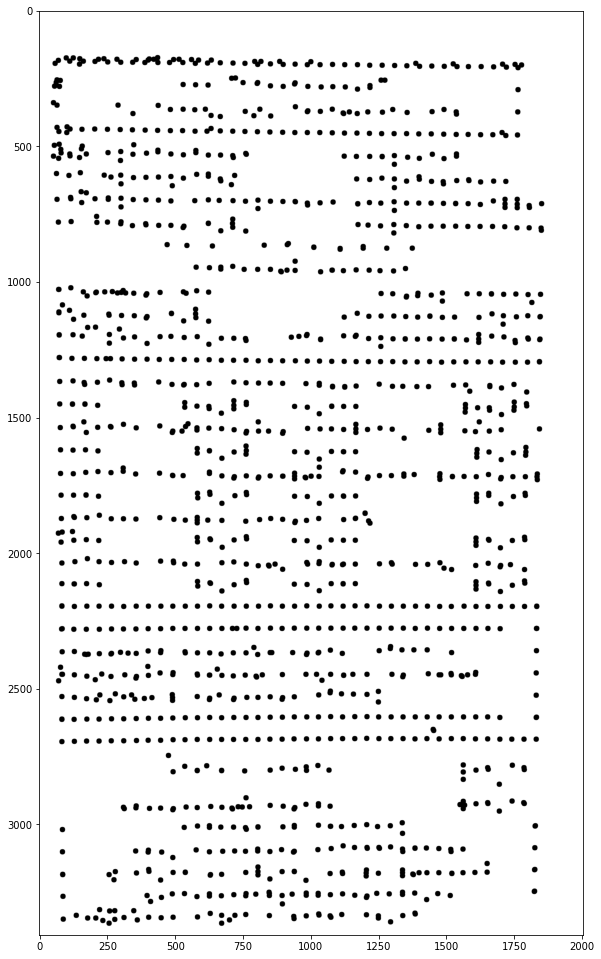

In [143]:
%%time
drawing = cv2.circle(np.dstack([np.full(im.shape, 255, 'uint8')]*3), ok_centers[0], radius=10, color=(0, 0, 0), thickness=-1)
for center in ok_centers:
    drawing = cv2.circle(drawing, center, radius=10, color=(0, 0, 0), thickness=-1)
imshow(drawing, (20, 17))

In [144]:
%%time
sorted_horizontal_first = sorted(sorted(ok_centers, key=lambda x: x[0]), key=lambda x: x[1])
last = sorted_horizontal_first[0][0]
level = 0
vertical_levels = []
for c in sorted_horizontal_first:
    if c[0] < last:
        level += 1
    vertical_levels.append(level)
    last = c[0]

CPU times: user 2.88 ms, sys: 0 ns, total: 2.88 ms
Wall time: 2.76 ms


In [145]:
%%time
sorted_vertical_first = sorted(sorted(ok_centers, key=lambda x: x[1]), key=lambda x: x[0])
last = sorted_vertical_first[0][1]
level = 0
horizontal_levels = []
for c in sorted_vertical_first:
    if c[1] < last:
        level += 1
    horizontal_levels.append(level)
    last = c[1]

CPU times: user 1.16 ms, sys: 30 µs, total: 1.19 ms
Wall time: 1.2 ms


In [146]:
%%time
temp = np.column_stack(([point[1] for point in sorted_horizontal_first], vertical_levels))
unique_levels = np.unique(temp[:, 1])
avg_y = np.array([(level, temp[np.where(temp[:, 1] == level)[0], 0].mean()) for level in unique_levels])
avg_y.shape

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.5 ms


(510, 2)

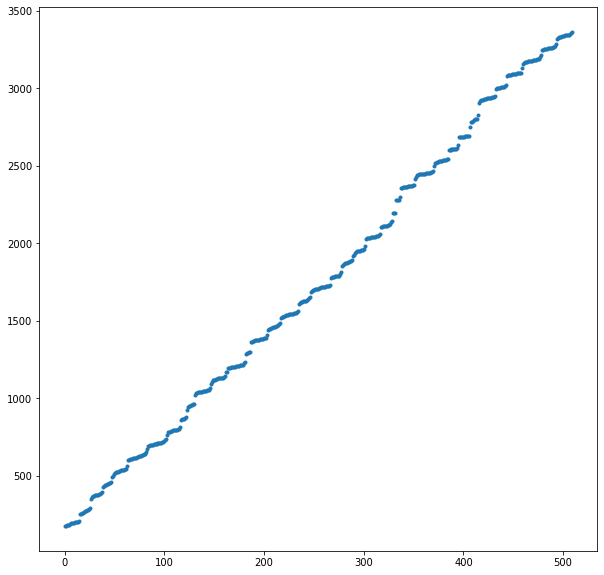

In [147]:
plt.figure(figsize=(10, 10))
# avg_y[:, 1] = (avg_y[:, 1] - avg_y[:, 1].mean()) / avg_y[:, 1].std()
plt.plot(avg_y[:, 0], avg_y[:, 1], '.')

In [148]:
%%time
temp = np.column_stack(([point[0] for point in sorted_vertical_first], horizontal_levels))
unique_levels = np.unique(temp[:, 1])
avg_x = np.array([(level, temp[np.where(temp[:, 1] == level)[0], 0].mean()) for level in unique_levels])
avg_x.shape

CPU times: user 25.8 ms, sys: 50 µs, total: 25.8 ms
Wall time: 25.2 ms


(466, 2)

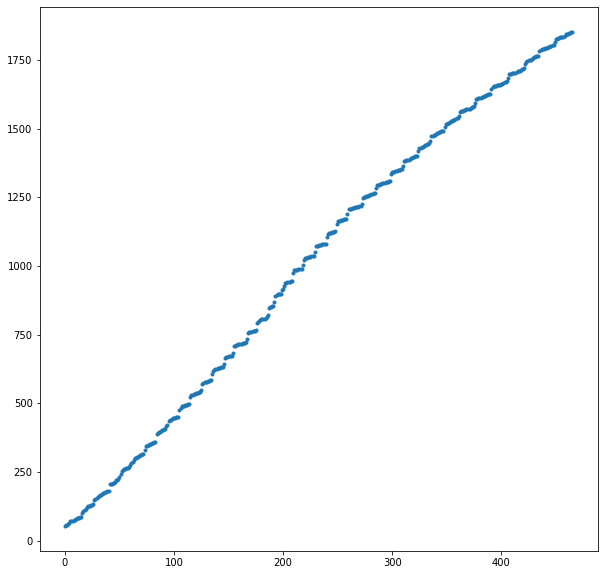

In [149]:
plt.figure(figsize=(10, 10))
# avg_y[:, 1] = (avg_y[:, 1] - avg_y[:, 1].mean()) / avg_y[:, 1].std()
plt.plot(avg_x[:, 0], avg_x[:, 1], '.')

CPU times: user 730 ms, sys: 32 ms, total: 762 ms
Wall time: 761 ms


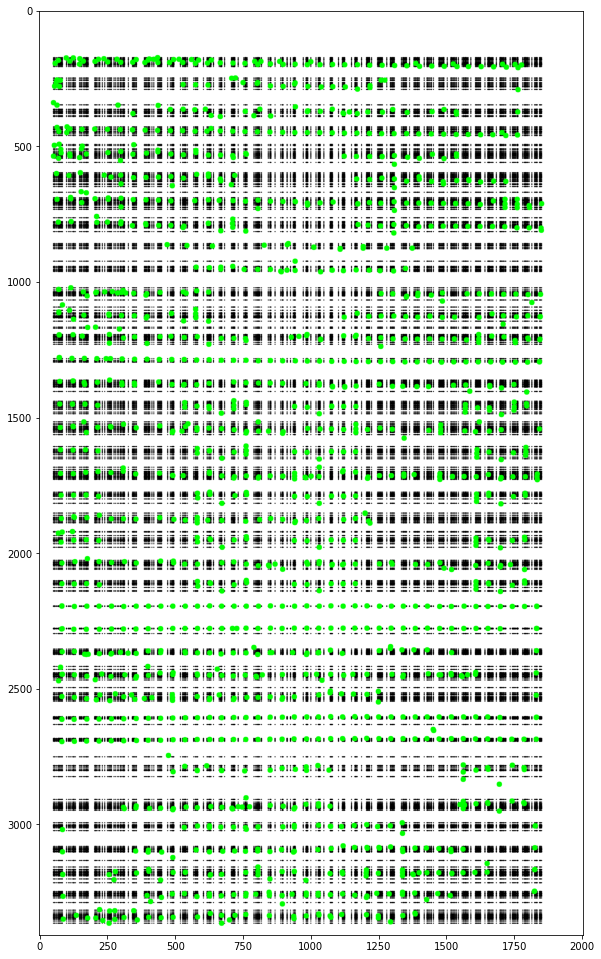

In [150]:
%%time
product = np.transpose([np.tile(avg_x[:, 1], len(avg_y[:, 1])), np.repeat(avg_y[:, 1], len(avg_x[:, 1]))])
product = [(int(p[0]), int(p[1])) for p in product]
drawing = np.dstack([np.full(im.shape, 255, 'uint8')]*3)
for center in product:
    drawing = cv2.circle(drawing, center, radius=2, color=(0, 0, 0), thickness=-1)
for center in ok_centers:
    drawing = cv2.circle(drawing, center, radius=10, color=(0, 255, 0), thickness=-1)
imshow(drawing, (20, 17))

In [151]:
%%time
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(product, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(product)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 2
CPU times: user 45min 3s, sys: 2min 4s, total: 47min 7s
Wall time: 47min 6s


CPU times: user 274 ms, sys: 12.4 ms, total: 286 ms
Wall time: 271 ms


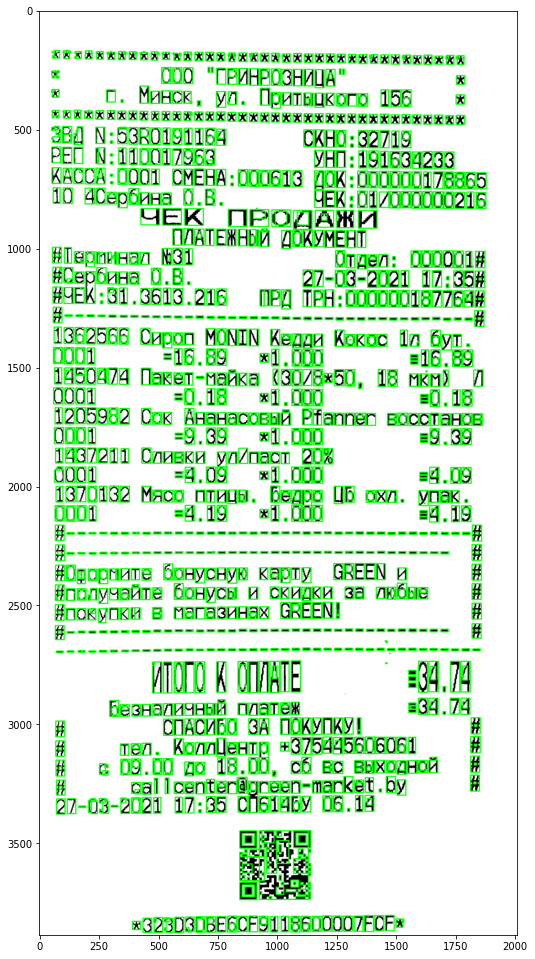

In [39]:
%%time
bounds = [get_bounds(cnt) for cnt in ok_contours]
drawing = cv2.drawContours(np.dstack([im]*3), bounds, -1, (0, 255, 0), 3)
imshow(drawing, (20, 17))

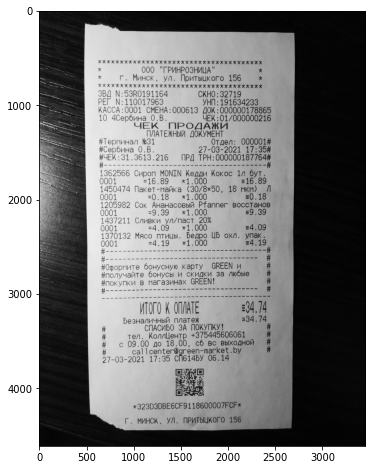

In [129]:
resize_coef = 1.
new_size = int(shape[1] * resize_coef), int(shape[0] * resize_coef)
resized_im = cv2.resize(im, new_size)
imshow(resized_im)